In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("BA_reviews.csv")
df

,Unnamed: 0,reviews
0,0,"Not Verified | Before my flight, I was forced ..."
1,1,✅ Trip Verified | British Airways at its bes...
2,2,✅ Trip Verified | An excellent flight! Despite...
3,3,✅ Trip Verified | I recently traveled with Bri...
4,4,✅ Trip Verified | My family and I were booke...
...,...,...
995,995,✅ Trip Verified | London to Seoul. Nightmare e...
996,996,Not Verified | London to Vancouver. Economy w...
997,997,❎ Not Verified | Newcastle to Delhi via London...
998,998,✅ Trip Verified | Miami to Delhi via London. ...


In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['Sentiment Scores'] = df['reviews'].apply(lambda review: sid.polarity_scores(review))
df['Compound Score'] = df['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
df['Sentiment'] = df['Compound Score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
print(df[['reviews', 'Sentiment', 'Compound Score']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               reviews Sentiment  \
0    Not Verified | Before my flight, I was forced ...  Negative   
1    ✅ Trip Verified |   British Airways at its bes...  Positive   
2    ✅ Trip Verified | An excellent flight! Despite...  Positive   
3    ✅ Trip Verified | I recently traveled with Bri...  Negative   
4    ✅ Trip Verified |   My family and I were booke...  Negative   
..                                                 ...       ...   
995  ✅ Trip Verified | London to Seoul. Nightmare e...  Negative   
996  Not Verified |  London to Vancouver. Economy w...  Positive   
997  ❎ Not Verified | Newcastle to Delhi via London...  Negative   
998  ✅ Trip Verified |  Miami to Delhi via London. ...  Negative   
999  Not Verified |  London to Sydney via Singapore...  Negative   

     Compound Score  
0           -0.8583  
1            0.9787  
2            0.9975  
3           -0.8223  
4           -0.9041  
..              ...  
995         -0.7345  
996    

In [43]:
df

,Unnamed: 0,reviews,Sentiment Scores,Compound Score,Sentiment
0,0,"Not Verified | Before my flight, I was forced ...","{'neg': 0.184, 'neu': 0.703, 'pos': 0.113, 'co...",-0.8583,Negative
1,1,✅ Trip Verified | British Airways at its bes...,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.9787,Positive
2,2,✅ Trip Verified | An excellent flight! Despite...,"{'neg': 0.025, 'neu': 0.658, 'pos': 0.318, 'co...",0.9975,Positive
3,3,✅ Trip Verified | I recently traveled with Bri...,"{'neg': 0.106, 'neu': 0.818, 'pos': 0.075, 'co...",-0.8223,Negative
4,4,✅ Trip Verified | My family and I were booke...,"{'neg': 0.109, 'neu': 0.868, 'pos': 0.023, 'co...",-0.9041,Negative
...,...,...,...,...,...
995,995,✅ Trip Verified | London to Seoul. Nightmare e...,"{'neg': 0.13, 'neu': 0.833, 'pos': 0.036, 'com...",-0.7345,Negative
996,996,Not Verified | London to Vancouver. Economy w...,"{'neg': 0.044, 'neu': 0.858, 'pos': 0.098, 'co...",0.4404,Positive
997,997,❎ Not Verified | Newcastle to Delhi via London...,"{'neg': 0.077, 'neu': 0.867, 'pos': 0.056, 'co...",-0.0900,Negative
998,998,✅ Trip Verified | Miami to Delhi via London. ...,"{'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...",-0.7549,Negative


from matplotlib import pyplot as plt
df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Compound Score'].plot(kind='hist', bins=20, title='Compound Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unnamed: 0', y='Compound Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Compound Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Compound Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Compound Score'].plot(kind='line', figsize=(8, 4), title='Compound Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Unnamed: 0', y='Sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Compound Score', y='Sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

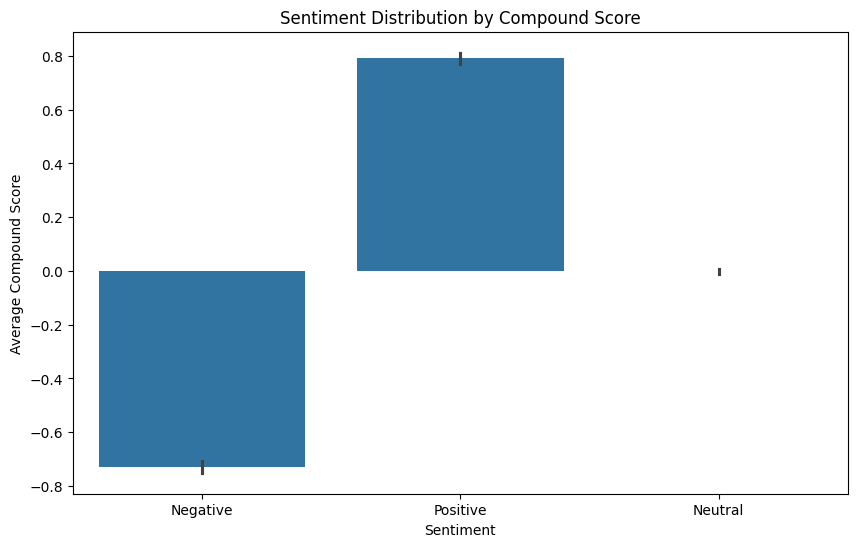

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Compound Score', data=df)
plt.title('Sentiment Distribution by Compound Score')
plt.xlabel('Sentiment')
plt.ylabel('Average Compound Score')
plt.show()

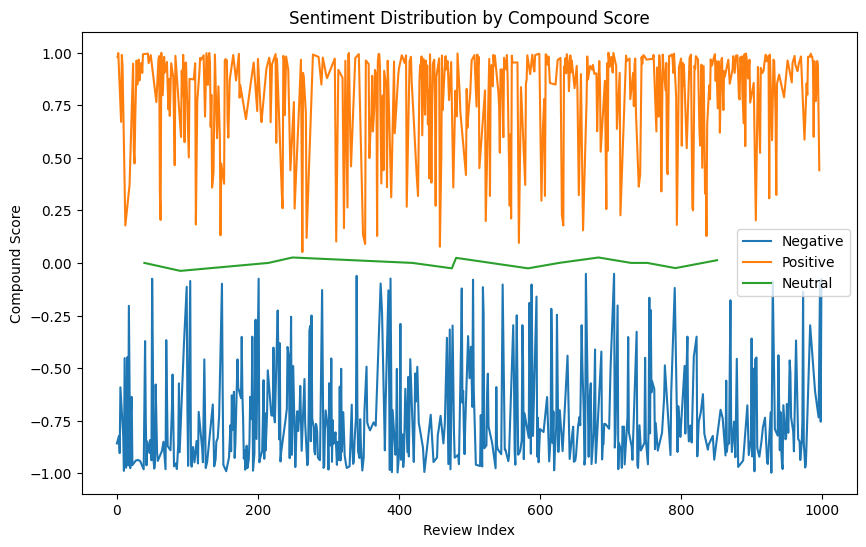

In [41]:
plt.figure(figsize=(10, 6))
for sentiment in df['Sentiment'].unique():
  df_subset = df[df['Sentiment'] == sentiment]
  plt.plot(df_subset.index, df_subset['Compound Score'], label=sentiment)
plt.title('Sentiment Distribution by Compound Score')
plt.xlabel('Review Index')
plt.ylabel('Compound Score')
plt.legend()
plt.show()


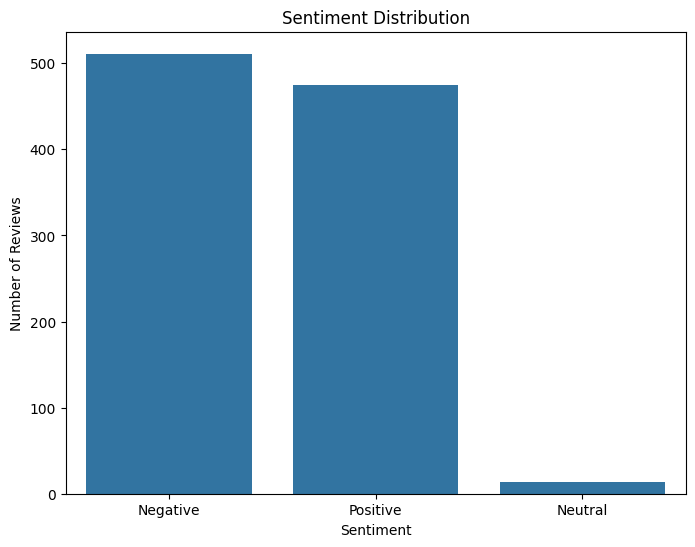

In [42]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
